In [2]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<IPython.core.display.Javascript object>

Evaluation metrics - they're used by humans to evaluate the ML model

Loss functions - they're used by computers to optimize the ML model

In [4]:
# from kaggle import api
# from kaggle.api.kaggle_api_extended import KaggleApi
# api = KaggleApi()
# api.authenticate()
# use the api normally
# api.competition_download_cli(...)

In [5]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Skipping, found downloaded files in ".\rossmann-store-sales" (use force=True to force download)


In [6]:
os.listdir('rossmann-store-sales')

['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']

In [7]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)

In [8]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [9]:
store_df = pd.read_csv('./rossmann-store-sales/store.csv')

In [10]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
merged_df=ross_df.merge(store_df,how='left',on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
test_df = pd.read_csv('rossmann-store-sales/test.csv')

In [13]:
merged_test_df = test_df.merge(store_df, how='left', on='Store') 
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [15]:
round(merged_df.describe().T,2) #transform

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [16]:
merged_df.duplicated().sum()

0

In [17]:
merged_df['Date']=pd.to_datetime(merged_df.Date)

In [18]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [19]:
merged_df.Date.min(),merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

Exploratory Data Analysis and Visualization
Objectives of exploratory data analysis:

Study the distributions of individual columns (uniform, normal, exponential)

Detect anomalies or errors in the data (e.g. missing/incorrect values)

Study the relationship of target column with other columns (linear, non-linear etc.)



<Axes: xlabel='Sales', ylabel='Count'>

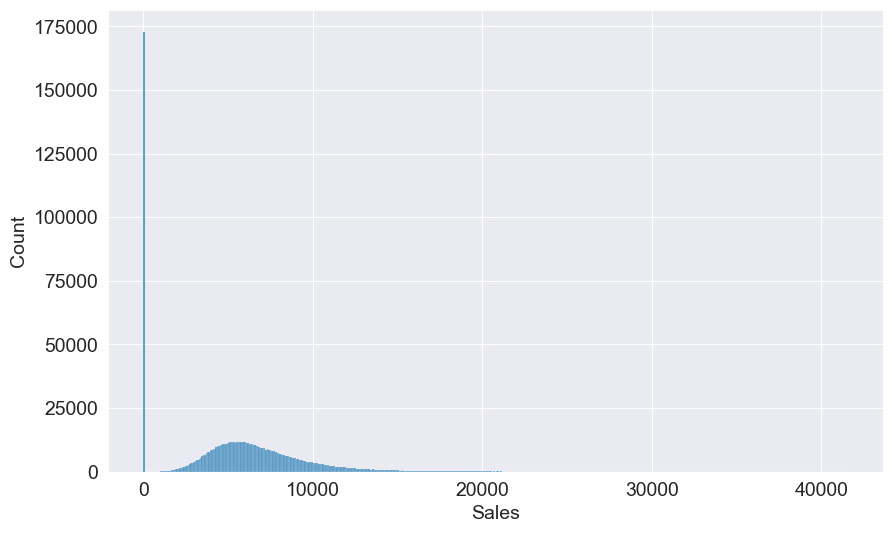

In [21]:
sns.histplot(data=merged_df,x='Sales')

In [22]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [23]:
merged_df.Sales.value_counts()

Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: count, Length: 21734, dtype: int64

Lets exclude the dates when the store was closed.

We can handle it as a special case while making predictions


In [33]:
merged_df=merged_df[merged_df.Open==1].copy()

In [34]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


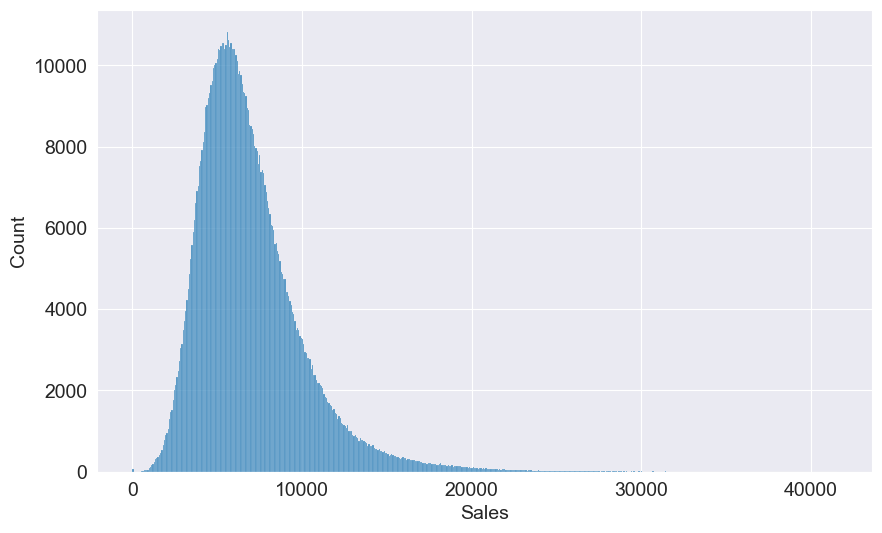

In [35]:
sns.histplot(data=merged_df,x="Sales");

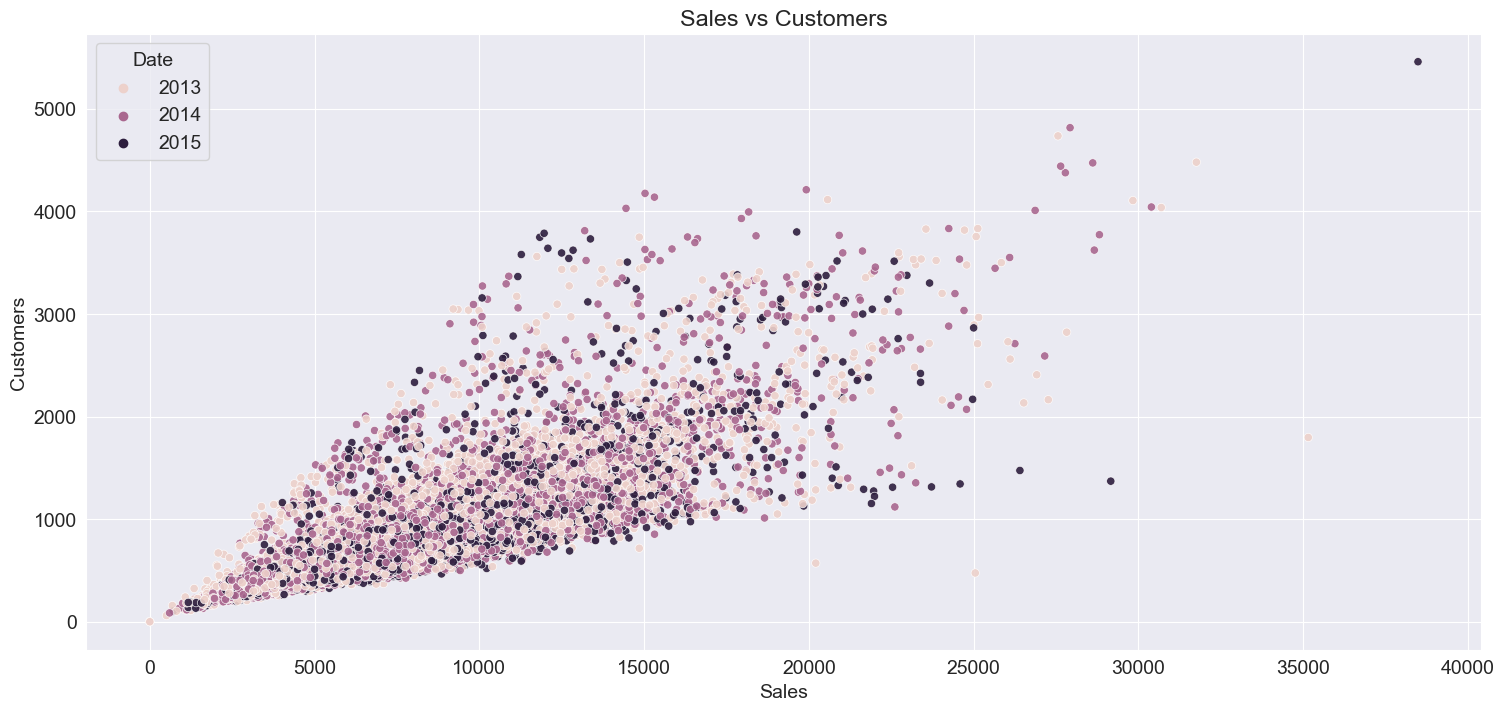

In [41]:
plt.figure(figsize=(18,8))
temp_df=merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales,y=temp_df.Customers,hue=temp_df.Date.dt.year,alpha=0.9)
plt.title("Sales vs Customers")
plt.show()

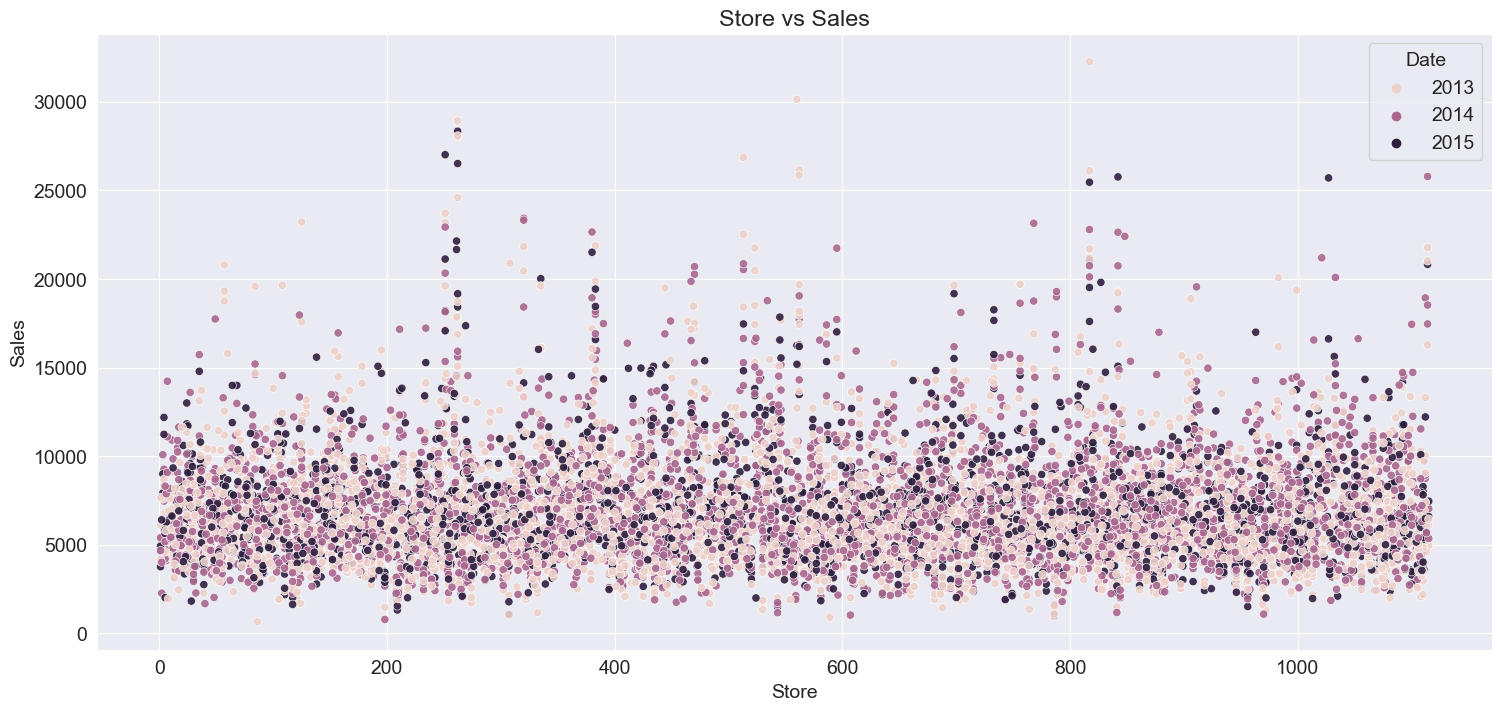

In [42]:
plt.figure(figsize=(18,8))
temp_df=merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store,y=temp_df.Sales,hue=temp_df.Date.dt.year,alpha=0.9)
plt.title("Store vs Sales")
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

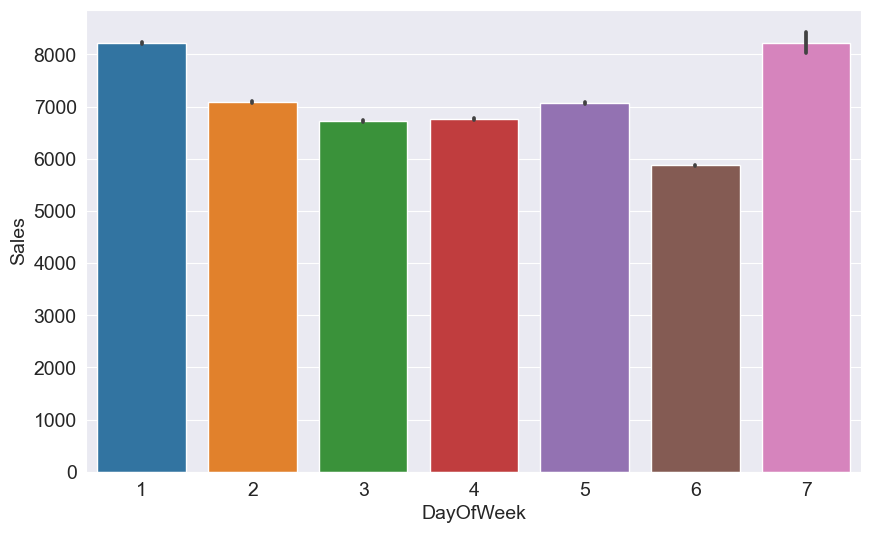

In [43]:
sns.barplot(data=merged_df,x='DayOfWeek',y="Sales")

<Axes: xlabel='Promo', ylabel='Sales'>

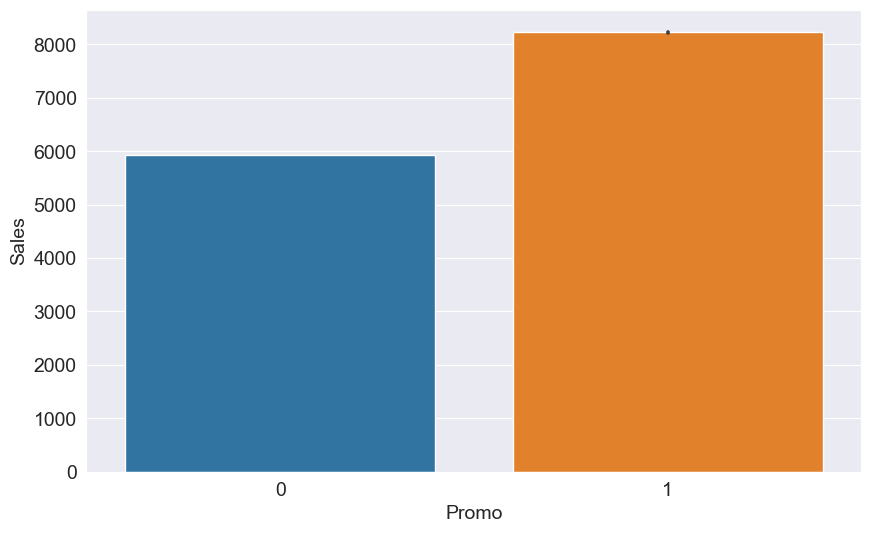

In [44]:
sns.barplot(data=merged_df,x='Promo',y='Sales')

<Axes: xlabel='StateHoliday', ylabel='Sales'>

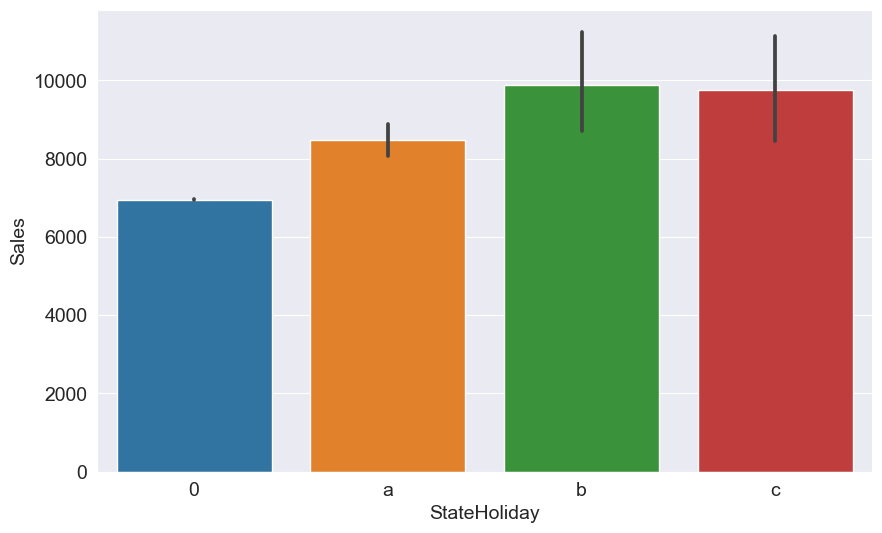

In [48]:
sns.barplot(data=merged_df,x='StateHoliday',y="Sales")

In [47]:
# merged_df.corr()['Sales'].sort_values(ascending=False)

Feature Engineering

Feature engineering is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources.

For example, here are some features that can be extracted from the "Date" column:

Day of ,week
fay or ,month
,
Mont,h
Year
Weekend,/Weekday
Month/Quarter End

In [66]:
merged_df['Day']=merged_df.Date.dt.day
merged_df['Month']=merged_df.Date.dt.month
merged_df['Year']=merged_df.Date.dt.year
merged_df['Week']=merged_df.Date.dt.isocalendar().week%4

In [67]:
merged_test_df['Day']=merged_test_df.Date.dt.day
merged_test_df['Month']=merged_test_df.Date.dt.month
merged_test_df['Year']=merged_test_df.Date.dt.year
merged_test_df['Week']=merged_test_df.Date.dt.isocalendar().week%4

<Axes: xlabel='Year', ylabel='Sales'>

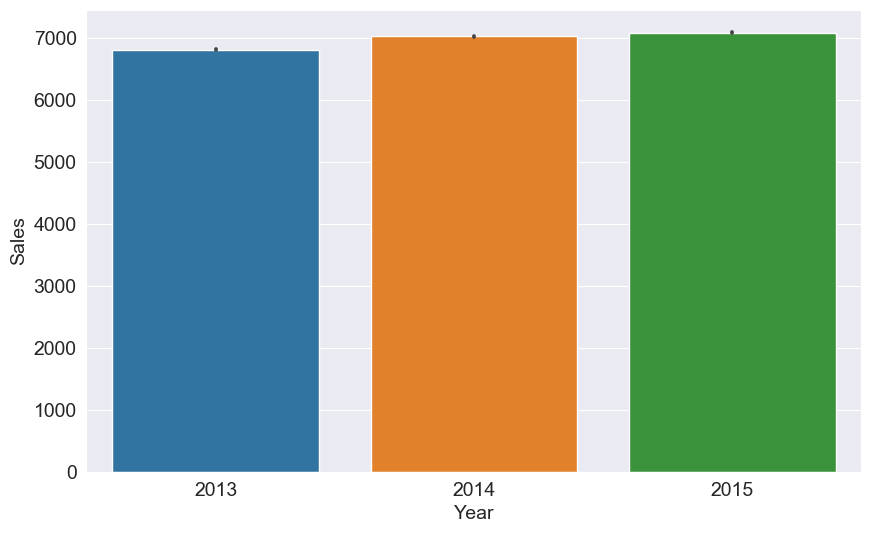

In [51]:
sns.barplot(data=merged_df,x='Year',y="Sales")

<Axes: xlabel='Month', ylabel='Sales'>

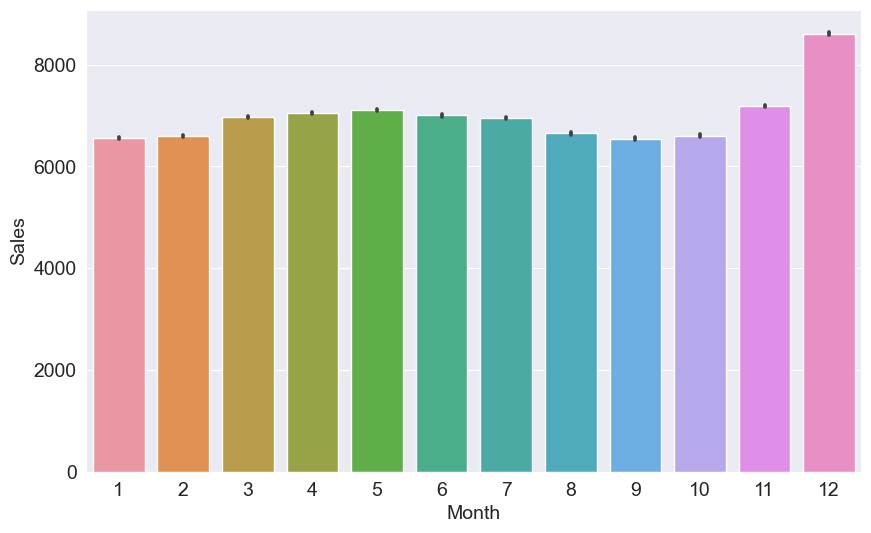

In [53]:
sns.barplot(data=merged_df,x='Month',y="Sales")

#we can see that the highest sales are in december

<Axes: xlabel='Day', ylabel='Sales'>

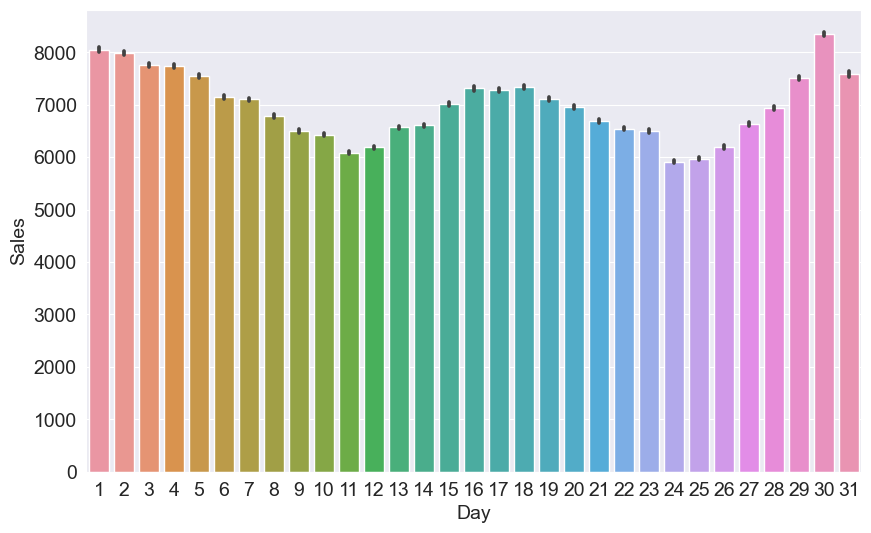

In [57]:
sns.barplot(data=merged_df,x='Day',y="Sales")

<Axes: xlabel='Week', ylabel='Sales'>

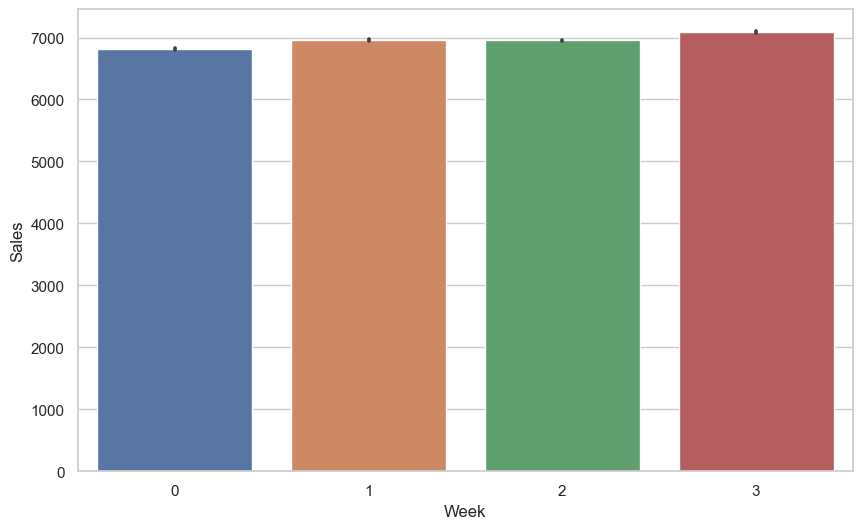

In [69]:
sns.barplot(data=merged_df,x="Week",y='Sales')

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

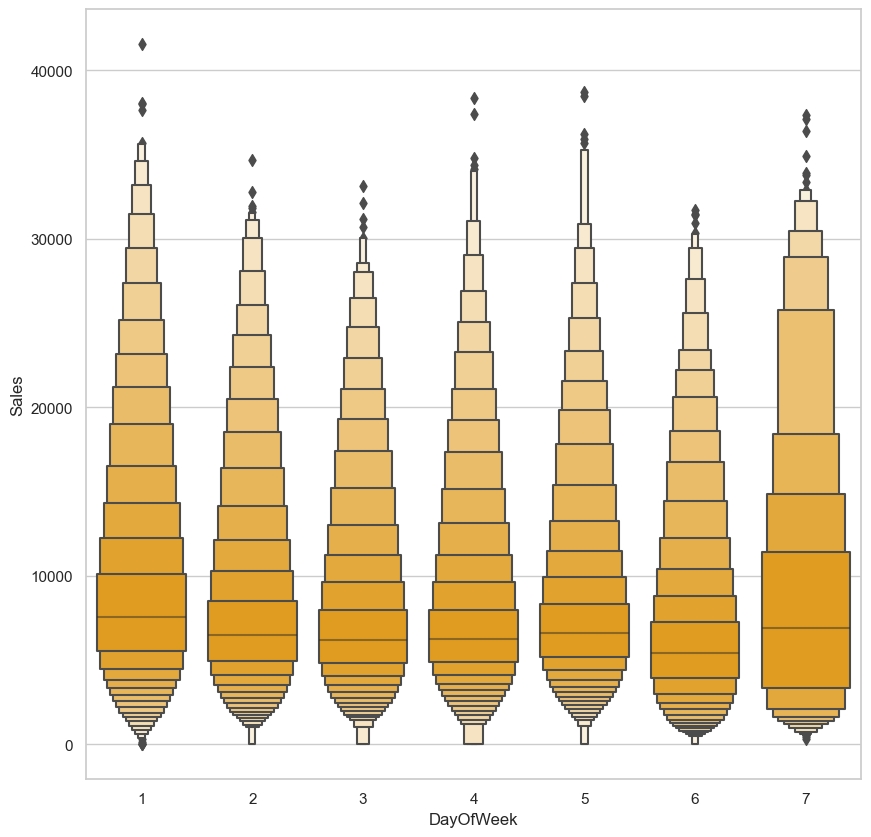

In [62]:
plt.figure(figsize=(10,10))
sns.set(style='whitegrid')
sns.boxenplot(data=merged_df,scale='linear',x='DayOfWeek',y='Sales',color='Orange')

In [75]:
mean=merged_df.groupby('Store')['Sales'].mean()
mean_df=pd.DataFrame(mean).reset_index()
merged_df=pd.merge(merged_df,mean_df,on='Store',how='left')

KeyError: 'Column not found: Sales'

In [88]:
merged_df.rename(columns={'Sales_y':"SalesMean",'Sales_x':'Sales'},inplace=True)

In [90]:
merged_df.SalesMean

0          4759.096031
1          4953.900510
2          6942.568678
3          9638.401786
4          4676.274711
              ...     
844387    11207.408705
844388    14933.288747
844389    10825.902335
844390     6936.760776
844391     9744.599788
Name: SalesMean, Length: 844392, dtype: float64

In [91]:
#log transformation

merged_df['SalesMean']=np.log(merged_df.SalesMean)

Train/Test/Validation Split

We'll set the last 25% of rows for the validation set, after ordering by date

In [93]:
len(merged_df)

844392

In [94]:
train_size=int(.75*len(merged_df))
train_size

633294

In [96]:
sorted_df=merged_df.sort_values('Date')
train_df,val_df=sorted_df[:train_size],sorted_df[train_size:]

In [97]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,Week,SalesMean
844391,1097,2,2013-01-01,5961,1405,1,0,a,1,b,b,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013,1,9.184469
844375,85,2,2013-01-01,4220,619,1,0,a,1,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013,1,8.891849
844376,259,2,2013-01-01,6851,1444,1,0,a,1,b,b,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013,1,9.362515
844377,262,2,2013-01-01,17267,2875,1,0,a,1,b,a,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013,1,9.938783
844378,274,2,2013-01-01,3102,729,1,0,a,1,b,b,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013,1,8.311602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211710,745,3,2014-12-10,6897,657,1,0,0,0,a,a,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014,2,8.922535
211720,756,3,2014-12-10,15736,2292,1,0,0,0,a,c,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014,2,9.715640
211712,747,3,2014-12-10,7444,608,1,0,0,0,c,c,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014,2,8.990584
211711,746,3,2014-12-10,5207,474,1,0,0,0,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014,2,8.706085


In [98]:
val_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,Week,SalesMean
211715,751,3,2014-12-10,3720,533,1,0,0,0,a,a,650.0,10.0,2006.0,0,NaN,NaN,NaN,10,12,2014,2,8.346693
211716,752,3,2014-12-10,4258,404,1,0,0,0,a,a,970.0,3.0,2013.0,1,31.0,2013.0,"Feb,May,Aug,Nov",10,12,2014,2,8.566299
211717,753,3,2014-12-10,7170,654,1,0,0,0,d,c,540.0,11.0,2012.0,1,35.0,2010.0,"Mar,Jun,Sept,Dec",10,12,2014,2,9.072259
211718,754,3,2014-12-10,7359,837,1,0,0,0,c,c,380.0,5.0,2008.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",10,12,2014,2,8.998008
211713,748,3,2014-12-10,4579,411,1,0,0,0,d,a,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014,2,8.654810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,745,5,2015-07-31,8363,746,1,1,0,1,a,a,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",31,7,2015,3,8.922535
744,746,5,2015-07-31,9082,638,1,1,0,1,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",31,7,2015,3,8.706085
745,747,5,2015-07-31,10708,826,1,1,0,1,c,c,45740.0,8.0,2008.0,0,NaN,NaN,NaN,31,7,2015,3,8.990584
739,741,5,2015-07-31,11253,1137,1,1,0,1,d,c,11900.0,NaN,NaN,0,NaN,NaN,NaN,31,7,2015,3,8.938462


In [99]:
train_df.Date.min(),train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [100]:
val_df.Date.min(),val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [101]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year', 'Week',
       'SalesMean'],
      dtype='object')

INput and target columns

In [107]:
input_cols=['Store','DayOfWeek','Promo','StateHoliday',
            'StoreType','Assortment','Day','Month','Year']

In [108]:
target_cols=['Sales']

In [113]:
merged_df[input_cols].nunique()

#linear models will suffer when categorical data is treated as numerical data,
#but decision trees can sort it out

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [114]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_cols].copy()

In [115]:
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_cols].copy()

In [116]:
test_inputs=merged_test_df[input_cols].copy()

In [118]:
numeric_cols=['Store','Day','Month','Year']
categorical_cols=['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

Imputation,Scaling and Encoding 

In [119]:
from sklearn.impute import SimpleImputer

In [120]:
imputer=SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [121]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [122]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year
844391,1097.0,2,0,a,b,b,1.0,1.0,2013.0
844375,85.0,2,0,a,b,a,1.0,1.0,2013.0
844376,259.0,2,0,a,b,b,1.0,1.0,2013.0
844377,262.0,2,0,a,b,a,1.0,1.0,2013.0
844378,274.0,2,0,a,b,b,1.0,1.0,2013.0
...,...,...,...,...,...,...,...,...,...
211710,745.0,3,0,0,a,a,10.0,12.0,2014.0
211720,756.0,3,0,0,a,c,10.0,12.0,2014.0
211712,747.0,3,0,0,c,c,10.0,12.0,2014.0
211711,746.0,3,0,0,d,c,10.0,12.0,2014.0


In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
scaler=MinMaxScaler().fit(train_inputs[numeric_cols])

In [125]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [126]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year
844391,0.983842,2,0,a,b,b,0.0,0.0,0.0
844375,0.075404,2,0,a,b,a,0.0,0.0,0.0
844376,0.231598,2,0,a,b,b,0.0,0.0,0.0
844377,0.234291,2,0,a,b,a,0.0,0.0,0.0
844378,0.245063,2,0,a,b,b,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
211710,0.667864,3,0,0,a,a,0.3,1.0,1.0
211720,0.677738,3,0,0,a,c,0.3,1.0,1.0
211712,0.669659,3,0,0,c,c,0.3,1.0,1.0
211711,0.668761,3,0,0,d,c,0.3,1.0,1.0


Encoding categorical cols as one hot vectors

In [127]:
from sklearn.preprocessing import OneHotEncoder

In [130]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [132]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

In [135]:
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'Promo_0',
 'Promo_1',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [133]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Promo_0,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
844391,0.983842,2,0,a,b,b,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
844375,0.075404,2,0,a,b,a,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
844376,0.231598,2,0,a,b,b,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
844377,0.234291,2,0,a,b,a,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
844378,0.245063,2,0,a,b,b,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211710,0.667864,3,0,0,a,a,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
211720,0.677738,3,0,0,a,c,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
211712,0.669659,3,0,0,c,c,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
211711,0.668761,3,0,0,d,c,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Lets now extract the numeric data

In [137]:
X_train=train_inputs[numeric_cols+encoded_cols]
X_val=val_inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]

In [138]:
X_train

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Promo_0,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
844391,0.983842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
844375,0.075404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
844376,0.231598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
844377,0.234291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
844378,0.245063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211710,0.667864,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
211720,0.677738,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
211712,0.669659,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
211711,0.668761,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Creating baseline models to benchmark future models

A baseline model helps establish the minimum score any ML model we train should achieve

Fixed/Random guess

In [145]:
def return_mean(inputs):
    return np.full(len(inputs),merged_df.Sales.mean())
  

In [146]:
train_preds=return_mean(X_train)
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

Lets evaluate this using the RMSE score

In [148]:
from sklearn.metrics import mean_squared_error

In [150]:
mean_squared_error(train_preds,train_targets,squared=False)

C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3082.450443277419

In [151]:
mean_squared_error(return_mean(X_val),val_targets,squared=False)

C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3168.6033635047716

The model is off by about 3000$ on avg

Lets try another model which makes a random guess b/w the lowest and highest sale

In [156]:
def guess_random(inputs):
    # lo,hi=merged_df.Sales.min(),merged_df.Sales.max()
    lo,hi=3000,18000
    return np.random.random(len(inputs))*(hi-lo)+lo

In [157]:
train_preds=guess_random(X_train)
train_preds

array([17625.47345522, 15323.99879456, 16072.6636298 , ...,
       17890.0183024 ,  7795.55152067,  9582.50114828])

In [158]:
mean_squared_error(guess_random(X_val),val_targets,squared=False)

C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


6289.616812677185

In [159]:
mean_squared_error(train_preds,train_targets,squared=False)

C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


6441.354623349864

 Baseline ML model

In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
linreg=LinearRegression().fit(X_train,train_targets)

In [164]:
train_preds=linreg.predict(X_train)
train_preds

array([[ 7136.],
       [10540.],
       [ 7060.],
       ...,
       [ 6248.],
       [ 6000.],
       [ 5616.]])

In [165]:
linreg.coef_

array([[ 1.02875759e+02, -1.01173532e+02,  6.40390489e+02,
         1.00865841e+02,  1.73552418e+15,  1.73552418e+15,
         1.73552418e+15,  1.73552418e+15,  1.73552418e+15,
         1.73552418e+15,  1.73552418e+15, -1.36150327e+15,
        -1.36150327e+15, -6.65065095e+13, -6.65065095e+13,
        -6.65065095e+13, -6.65065095e+13,  4.57822055e+14,
         4.57822055e+14,  4.57822055e+14,  4.57822055e+14,
        -2.29879283e+16, -2.29879283e+16, -2.29879283e+16]])

In [167]:
mean_squared_error(train_preds,train_targets,squared=False)

C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2741.623912549294

In [168]:
val_preds=linreg.predict(X_val)
val_preds

array([[5616.],
       [5616.],
       [6000.],
       ...,
       [8624.],
       [8376.],
       [7808.]])

In [169]:
mean_squared_error(val_preds,val_targets,squared=False)

C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2817.7976402877134

This simple Linear regression model isnt much better than our fixed baseline model which always pedicted the mean.


Training a model and tuning the hyperparameters

Find out which models are applicable to the problem you're solving.

Train a basic version for each type of model that's applicable

Identify the modeling approaches that work well and tune their hypeparameters

In [170]:
def try_model(model):
    #Fit the model
    model.fit(X_train,train_targets)
    #generate predictions
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_val)
    #compute RMSE
    train_rmse=mean_squared_error(train_targets,train_preds,squared=False)
    val_rmse=mean_squared_error(val_targets,val_preds,squared=False)
    return train_rmse, val_rmse
    

In [176]:
from sklearn.linear_model import Ridge, Lasso,ElasticNet,SGDRegressor

reg = Ridge(alpha=.5)
lasso=Lasso()

In [177]:
try_model(reg)

C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2741.5871927098874, 2817.779130071117)

In [175]:
try_model(lasso)

C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2741.7143904640566, 2817.9472924045217)

In [182]:
try_model(ElasticNet(alpha=0.2))

C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2794.7237944804474, 2881.562255344046)

In [179]:
try_model(SGDRegressor())

C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2742.50991390025, 2813.353853560536)

In [183]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [184]:
tree=DecisionTreeRegressor(random_state=42)
try_model(tree)

C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.0, 1559.7378600480247)

[Text(0.5, 0.9, 'Promo_0 <= 0.5\nsquared_error = 9494721.741\nsamples = 633294\nvalue = 6873.18'),
 Text(0.25, 0.7, 'DayOfWeek_1 <= 0.5\nsquared_error = 10053046.41\nsamples = 280741\nvalue = 8160.121'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Month <= 0.955\nsquared_error = 8559596.144\nsamples = 223344\nvalue = 7757.247'),
 Text(0.0625, 0.3, 'StoreType_b <= 0.5\nsquared_error = 7967330.328\nsamples = 210684\nvalue = 7631.861'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Day <= 0.35\nsquared_error = 13800173.481\nsamples = 12660\nvalue = 9843.895'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Month <= 0.955\nsquared_error = 12775230.673\nsamples = 57397\nvalue = 9727.788'),
 Text(0.3125, 0.3, 'Day <= 0.95\nsquared_error = 11907411.6\nsamples = 54232\nvalue = 9578.715'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Day <= 0.2

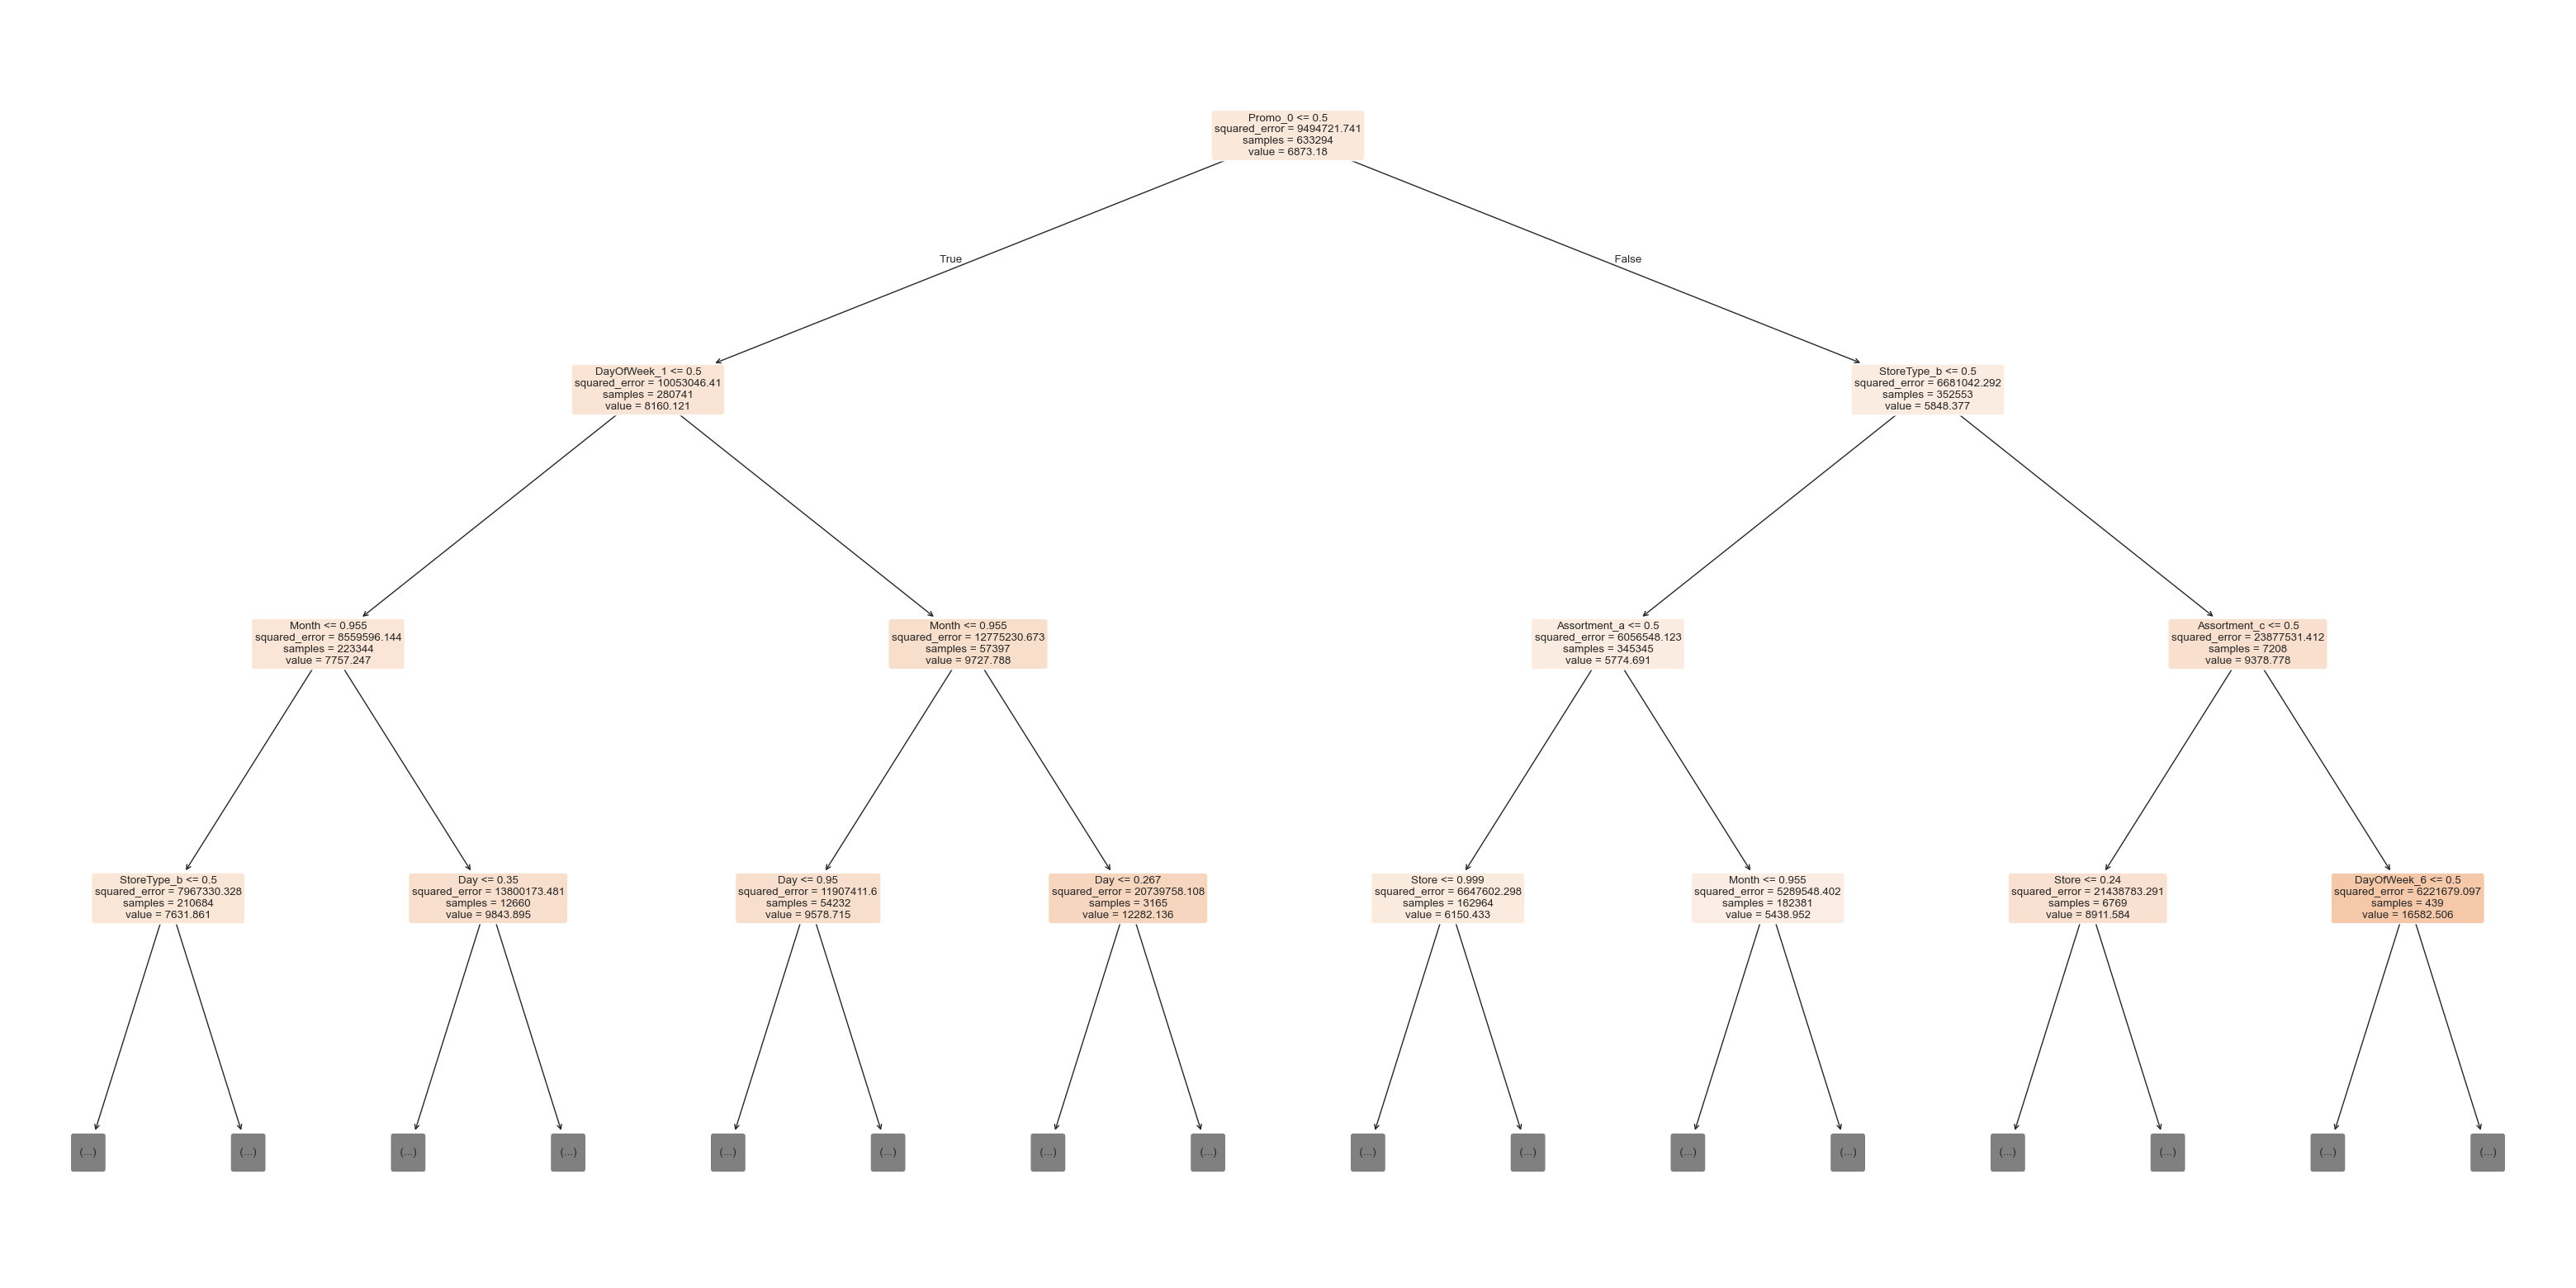

In [186]:
plt.figure(figsize=(40,20))
plot_tree(tree,max_depth=3,filled=True,rounded=True,feature_names=numeric_cols+encoded_cols)

In [190]:
from sklearn.ensemble import RandomForestRegressor

In [196]:
rf=RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=20)
# try_model(rf)
#taking too much time

C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(517.6751718026028, 1396.2587846734004)

In [198]:
rf=RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=20)
rf.fit(X_train,train_targets)
# try_model(rf)
#taking too much time

C:\Users\Vedashree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=42)

In [194]:
#train_preds=517.6, val_preds=1396 with n_estimators=20

Regularization and ensembling

Hyperparameter optimization and grid search

K fold cross validation

split the training data into n folds, then you train n models with one fold as validation the rest as training etc

Ensembing and stacking

Ensembling refers to combining the results of multiple models

Stacking is a more advanced version of ensembling, where we train another model using the results from multiple models.

Interpretation and Presentation

In [200]:
X_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [201]:
rf.feature_importances_

array([6.08577433e-01, 4.90298415e-02, 4.72174228e-02, 9.16706445e-03,
       3.36236378e-02, 4.43197097e-03, 2.39532415e-03, 2.08193346e-03,
       5.70225783e-03, 6.82231256e-03, 4.56073208e-03, 6.93383116e-02,
       6.93642477e-02, 1.16914604e-03, 1.93093531e-04, 2.71813242e-05,
       2.24652904e-05, 1.30160460e-02, 2.26595870e-02, 1.02901583e-02,
       1.38822499e-02, 8.09192402e-03, 5.52821094e-03, 1.28074475e-02])

In [205]:
importance_df=pd.DataFrame({
    'feature':numeric_cols+encoded_cols,
    'importance':rf.feature_importances_
}).sort_values('importance',ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.608577
12,Promo_1,0.069364
11,Promo_0,0.069338
1,Day,0.049030
2,Month,0.047217
4,DayOfWeek_1,0.033624
18,StoreType_b,0.022660
20,StoreType_d,0.013882
17,StoreType_a,0.013016
23,Assortment_c,0.012807


<Axes: xlabel='importance', ylabel='feature'>

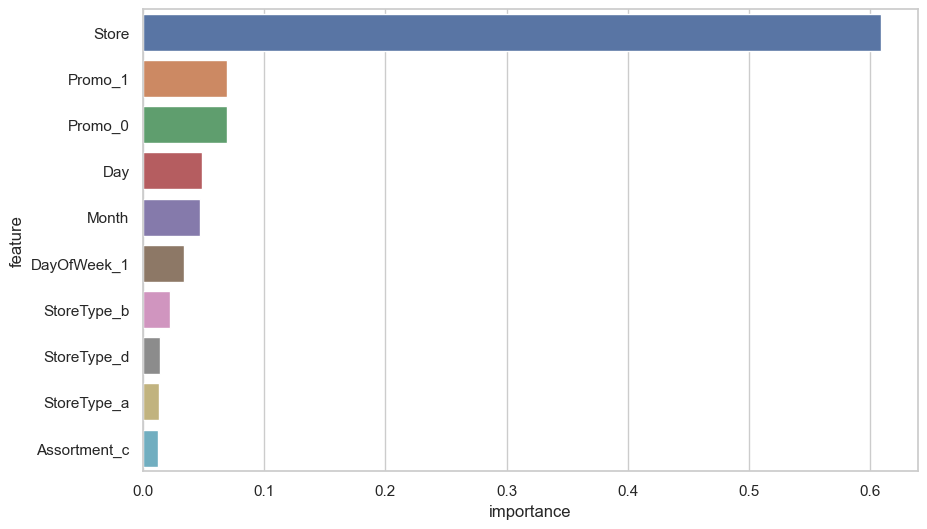

In [206]:
sns.barplot(data=importance_df.head(10),x='importance',y='feature')

Looking at individual predictions

In [208]:
def predict_inputs(model,single_input):
    if single_input['Open']==0:
        return 0.
    input_df=pd.DataFrame([single_input])
    input_df['Date']=pd.to_datetime(input_df.Date)
    input_df['Day']=input_df.Date.dt.day
    input_df['Month']=input_df.Date.dt.month
    input_df['Year']=input_df.Date.dt.year
    input_df[numeric_cols]=imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols]=scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols]=encoder.transform(input_df[categorical_cols])
    X_input=input_df[numeric_cols+encoded_cols]
    pred=model.predict(X_input)[0]
    return pred
    

In [213]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 1,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

In [214]:
sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 1,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [215]:
predict_inputs(rf, sample_input)

4107.65

In [216]:
X_test

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Promo_0,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.001795,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.005386,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.006284,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.007181,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,0.996409,0.000000,0.636364,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
41084,0.997307,0.000000,0.636364,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41085,0.998205,0.000000,0.636364,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
41086,0.999102,0.000000,0.636364,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [217]:
test_preds=rf.predict(X_test)
test_preds

array([ 4107.65,  7750.75,  8794.25, ...,  6032.95, 20738.55,  6717.4 ])

In [218]:
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [219]:
submission_df['Sales']=test_preds*test_df['Open'].astype('float')

In [220]:
submission_df

,Id,Sales
0,1,4107.65
1,2,7750.75
2,3,8794.25
3,4,6874.60
4,5,6628.50
...,...,...
41083,41084,3185.00
41084,41085,8505.95
41085,41086,6032.95
41086,41087,20738.55


In [221]:
submission_df.fillna(0,inplace=True)

In [222]:
submission_df

,Id,Sales
0,1,4107.65
1,2,7750.75
2,3,8794.25
3,4,6874.60
4,5,6628.50
...,...,...
41083,41084,3185.00
41084,41085,8505.95
41085,41086,6032.95
41086,41087,20738.55


In [229]:
submission_df.to_csv('submission.csv',index=None)

In [230]:
# !head submission.csv

In [231]:
from IPython.display import FileLink

In [232]:
FileLink('submission.csv')

C:\Users\Vedashree\submission.csv

In [233]:
import csv

In [234]:
submission_df.to_csv('submission.csv',index=None)

In [235]:
from IPython.display import FileLink

In [236]:
FileLink('submission.csv')

C:\Users\Vedashree\submission.csv

In [237]:
submission_df.to_csv('Downloads/submission.csv',index=None)